In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
y2 = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print("mean_squared_error:", mean_squared_error(y1, t))
print("mean_squared_error:", mean_squared_error(y2, t))
print("cross_entropy_error:", cross_entropy_error(y1, t))
print("cross_entropy_error:", cross_entropy_error(y2, t))

mean_squared_error: 0.09750000000000003
mean_squared_error: 0.5975
cross_entropy_error: 0.510825457099338
cross_entropy_error: 2.302584092994546


In [5]:
import sys
sys.path.append(r"C:\Users\kanan\OneDrive\ドキュメント\build_deep_learning_from_zero\deep-learning-from-scratch")
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print("x_batch.shape:", x_batch.shape)
print("t_batch.shape:", t_batch.shape)

x_batch.shape: (10, 784)
t_batch.shape: (10, 10)


In [7]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [8]:
y = np.array([1, 2, 3])
t = np.array([0, 0, 1])
print(cross_entropy_error(y, t))
print(y.reshape(1, len(y)).shape)
print(y.size)

-1.0986123220014423
(1, 3)
3


In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, len(t))
        y = y.reshape(1, len(y))
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t])) / batch_size

In [10]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [11]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

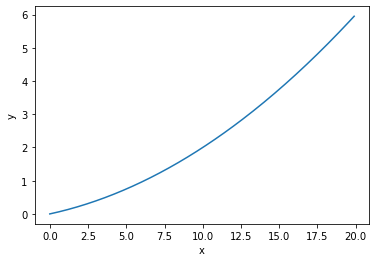

In [12]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)

In [13]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [14]:
def function_2(x):
    return np.sum(x**2)

In [15]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [16]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [17]:
def gradient_decent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [18]:
init_x = np.array([-3.0, 4.0])
# print(gradient_decent(function_2, init_x=init_x, lr=0.1))
# print(gradient_decent(function_2, init_x=init_x, lr=1.0))
print(gradient_decent(function_2, init_x=init_x, lr=0.01))

[-0.39785867  0.53047822]


In [19]:
import sys
sys.path.append(".\deep-learning-from-scratch")
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [20]:
net = simpleNet()
print(net.W)

[[ 1.66639613  0.12213246  1.29869565]
 [ 0.79746588  1.4543141  -1.06677038]]


In [21]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.71755697  1.38216217 -0.18087595]


In [22]:
print(np.argmax(p))

0


In [23]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.5216170754091523

In [24]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.32173976  0.23006185 -0.55180161]
 [ 0.48260964  0.34509278 -0.82770242]]


In [25]:
from common.functions import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

In [26]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)

(784, 100)


In [27]:
x = np.random.rand(100, 784)
y_pred = net.predict(x)
print("y_pred.shape:", y_pred.shape)

y_pred.shape: (100, 10)


In [28]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads["W1"].shape)

(784, 100)


In [41]:
import sys
sys.path.append(".\deep-learning-from-scratch\ch04")
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

(0, 9)

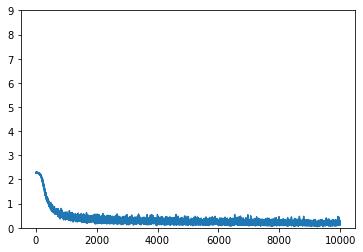

In [49]:
plt.plot(range(iters_num), train_loss_list)
plt.ylim(0, 9)

(0, 3)

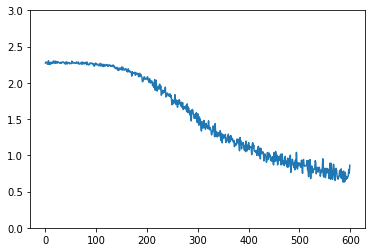

In [53]:
plt.plot(range(600), train_loss_list[:600])
plt.ylim(0, 3)

In [59]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ["W1", "b1", "W2", "b2"]:
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc:{:.2f}\ttest acc{:.2f}".format(train_acc, test_acc))

train acc:0.10	test acc0.10
train acc:0.79	test acc0.79
train acc:0.88	test acc0.88
train acc:0.90	test acc0.90
train acc:0.91	test acc0.91
train acc:0.92	test acc0.92
train acc:0.92	test acc0.92
train acc:0.92	test acc0.93
train acc:0.93	test acc0.93
train acc:0.93	test acc0.93
train acc:0.93	test acc0.93
train acc:0.94	test acc0.94
train acc:0.94	test acc0.94
train acc:0.94	test acc0.94
train acc:0.94	test acc0.94
train acc:0.94	test acc0.94
train acc:0.95	test acc0.94


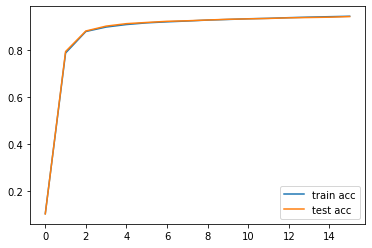

In [63]:
plt.plot(range(16), train_acc_list[:16], label="train acc")
plt.plot(range(16), test_acc_list[:16], label="test acc")
plt.legend()